In [ ]:
import gdown
url = "https://drive.google.com/file/d/1FbNVvl_QW2A2eeK8f0ho2OasEOdf2iL6/view?usp=drive_link"

In [ ]:
file_id = url.split("/")[-2]

In [ ]:
file_id

In [ ]:
prefix = "https://drive.google.com/uc?/export=download&id="

In [ ]:
prefix+file_id

In [ ]:
gdown.download(prefix+file_id, "KidneyData.csv.zip")

In [1]:
import os
import zipfile
import random
import splitfolders
os.listdir()

['Normal- (985).jpg', 'output', 'trials.ipynb']

In [2]:
os.chdir('../')

In [ ]:
images_dir = os.path.join(os.getcwd(),'artifact','data_ingestion', 'train_test_val')
images_dir

In [ ]:
os.listdir(images_dir)

In [3]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32 
EPOCHS = 5 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
    )
test_datagen = ImageDataGenerator(rescale=1./255,
preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(rescale=1./255,
preprocessing_function=preprocess_input)

images_dir = os.path.join(os.getcwd(),'artifact','data_ingestion', 'train_test_val')


train_data = train_datagen.flow_from_directory(
    directory=images_dir+'//train',
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    
)

test_data = test_datagen.flow_from_directory(
    directory=images_dir+'//test',
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical' 
)

val_data = val_datagen.flow_from_directory(
    directory=images_dir+'//val',
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical' 
)

Found 7747 images belonging to 3 classes.
Found 1110 images belonging to 3 classes.
Found 2212 images belonging to 3 classes.


In [8]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32, 3)


In [18]:
class_names = train_data.class_indices
class_labels = {v:k for k, v in class_names.items()}

In [19]:
class_labels

{0: 'Cyst', 1: 'Normal', 2: 'Tumor'}

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [34]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_2 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_3 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_data, epochs=EPOCHS, validation_data=val_data)

Epoch 1/5
243/243 [==============================] - 425s 2s/step - loss: 0.6570 - accuracy: 0.7643 - val_loss: 0.6253 - val_accuracy: 0.8603
Epoch 2/5
243/243 [==============================] - 410s 2s/step - loss: 0.3167 - accuracy: 0.8721 - val_loss: 0.2581 - val_accuracy: 0.9394
Epoch 3/5
243/243 [==============================] - 410s 2s/step - loss: 0.1746 - accuracy: 0.9306 - val_loss: 0.0420 - val_accuracy: 0.9905
Epoch 4/5
243/243 [==============================] - 420s 2s/step - loss: 0.1124 - accuracy: 0.9586 - val_loss: 0.0697 - val_accuracy: 0.9733
Epoch 5/5
243/243 [==============================] - 409s 2s/step - loss: 0.0770 - accuracy: 0.9729 - val_loss: 0.0606 - val_accuracy: 0.9738


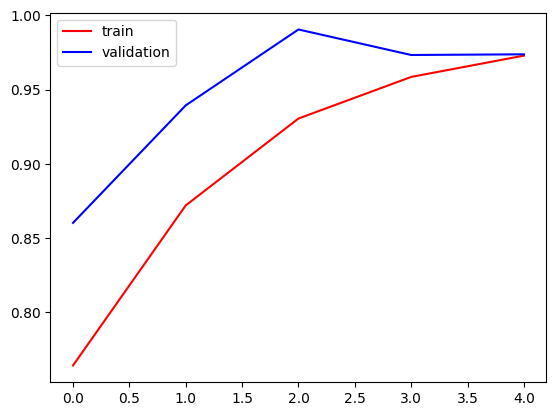

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

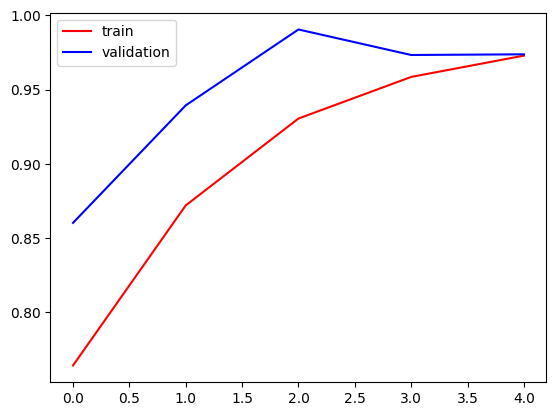

In [19]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_batch = next(val_data)
img = test_batch[0][6]

plt.imshow(img)
plt.axis('off')

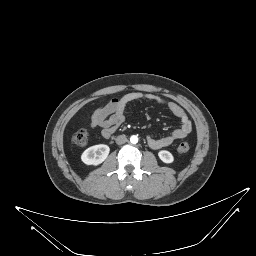

In [26]:
from tensorflow.keras.preprocessing import image

img = image.load_img('./research/Normal- (985).jpg', target_size=(256,256))
img

In [27]:
image_array = image.img_to_array(img)
image_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [28]:
img_array = np.expand_dims(image_array, axis=0)

In [29]:
img_arr = preprocess_input(img_array)

In [30]:
predictions = model.predict(img_arr)

1/1 [==============================] - 0s 127ms/step


In [31]:
predictions

array([[1., 0., 0.]], dtype=float32)

In [32]:
predicted_class = np.argmax(predictions, axis=1)

class_label = {v:k for k,v in class_names.items()}


In [33]:
class_label[predicted_class[0]]

'Cyst'

In [ ]:
model.evaluate(test_data)
model.save('.//')

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 

In [2]:
os.listdir()

['Normal- (985).jpg', 'output', 'trials.ipynb']

In [3]:
os.chdir('../')

In [4]:
new_model = tf.keras.models.load_model('./saved_model/classifier.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [44]:
new_model.evaluate(test_data)

35/35 [==============================] - 16s 457ms/step - loss: 0.1305 - accuracy: 0.9631


[0.13052818179130554, 0.9630630612373352]

In [48]:
image_path = os.path.join(r'C:\Users\nikhi\Kidney_Disease_Classification\research\Tumor- (2278).jpg')
img = tf.keras.utils.load_img(
    image_path, target_size=(256,256)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
prediction = new_model.predict(img_array)
score = tf.nn.softmax(prediction[0])

print(
    class_labels[np.argmax(score)]
)
print()

1/1 [==============================] - 0s 54ms/step
Tumor



Use TensorFlow Lite